<a href="https://colab.research.google.com/github/vjduarte/ANN_FASD/blob/master/FASD_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colorama


In [ ]:
# before proceeding further.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
from colorama import init,Fore,Back,Style
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras import layers
from keras.layers import LeakyReLU


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
trainPycho = pd.read_csv(r"trainpycho1.csv")

trainPycoLabel=pd.read_csv(r"trainpycholabel1.csv")
Train=trainPycho.to_numpy()
TrainLabel=trainPycoLabel.to_numpy()
print(TrainLabel.shape,Train.shape)

(128, 1) (128, 20)


In [ ]:
trainPycho1 = pd.read_csv(r"trainpycho.csv")

trainPycoLabel1=pd.read_csv(r"trainpycholabel.csv")
input_train=trainPycho1.to_numpy()
target_train=trainPycoLabel1.to_numpy()
print(input_train.shape,target_train.shape)

(82, 20) (82, 1)


In [ ]:
testPycho = pd.read_csv(r"testpycho.csv")
testPycoLabel=pd.read_csv(r"testpychoLabel.csv")
Test=testPycho.to_numpy()
TestLabel=testPycoLabel.to_numpy()
print(TestLabel.shape,Test.shape)

(45, 1) (45, 20)


In [ ]:
train_x, validation_x , train_y, validation_y = train_test_split(Train, TrainLabel, test_size=0.25, random_state=42)

In [ ]:
num_training_examples = 0
num_validation_examples = 0

for example in train_x:
  num_training_examples += 1

for example in validation_x:
  num_validation_examples += 1

num_classes=2

print('Total Number of Training: {}'.format(num_training_examples))
print('Total Number of Validation: {} \n'.format(num_validation_examples))

Total Number of Training: 96
Total Number of Validation: 32 



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='sigmoid', input_shape=[20]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation=tf.nn.softmax)
])
#tf.nn.softmax
#activation=LeakyReLU(alpha=0.2)

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                525       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS=1000
validation_split = 0.2
verbosity = 0
history = model.fit(input_train,target_train,epochs=EPOCHS, verbose=verbosity,
          validation_split=validation_split,validation_data=Test.all())
print("Finished training the model")
score = model.evaluate(Test, TestLabel, verbose=0)
print(f'Test loss for Keras Leaky ReLU CNN: {score[0]} / Test accuracy: {score[1]}')
#model.weights

Finished training the model
Test loss for Keras Leaky ReLU CNN: 0.967512845993042 / Test accuracy: 0.6000000238418579


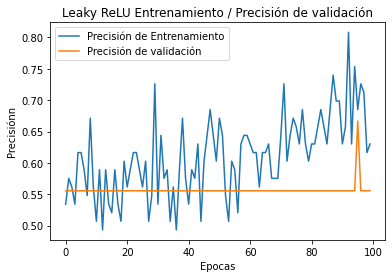

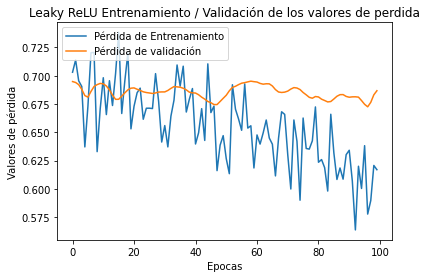

In [ ]:
# Visualize model history
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Leaky ReLU Entrenamiento / Precisión de validación')
plt.ylabel('Precisiónn')
plt.xlabel('Epocas')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Leaky ReLU Entrenamiento / Validación de los valores de perdida')
plt.ylabel('Valores de pérdida')
plt.xlabel('Epocas')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=[20]),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation=tf.nn.softmax)
])
model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
EPOCHS=100
validation_split = 0.3
verbosity = 1
history1 = model1.fit(input_train,target_train,epochs=EPOCHS, verbose=verbosity,
          validation_split=validation_split,validation_data=Test.all())
print("Finished training the model")
score1 = model.evaluate(Test, TestLabel, verbose=0)
print(f'Test loss for Keras Leaky ReLU CNN: {score1[0]} / Test accuracy: {score1[1]}')
model1.weights

Epoch 1/100
2/2 [==============================] - 0s 23ms/step - loss: 0.6968 - accuracy: 0.4737 - val_loss: 0.6971 - val_accuracy: 0.2400
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6959 - accuracy: 0.5088 - val_loss: 0.6976 - val_accuracy: 0.2400
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6901 - accuracy: 0.5088 - val_loss: 0.6981 - val_accuracy: 0.2400
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5263 - val_loss: 0.6986 - val_accuracy: 0.2400
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 0.6949 - accuracy: 0.5088 - val_loss: 0.6991 - val_accuracy: 0.2400
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.6976 - accuracy: 0.4386 - val_loss: 0.6995 - val_accuracy: 0.2400
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.6983 - accuracy: 0.4912 - val_loss: 0.6998 - val_accuracy: 0.2400
Epoch 8/100
2/2 [=======

[<tf.Variable 'dense_45/kernel:0' shape=(20, 4) dtype=float32, numpy=
 array([[-0.27206922, -0.483668  , -0.05529681, -0.42369163],
        [ 0.18061447, -0.10291738, -0.25235307,  0.14890337],
        [-0.22682118,  0.16838269, -0.2627365 , -0.07811832],
        [ 0.3317412 , -0.11689407,  0.36941698,  0.18672323],
        [ 0.18106699,  0.06372487,  0.5187195 ,  0.15840113],
        [-0.04760718, -0.38696867, -0.20161116, -0.22855568],
        [-0.4696107 ,  0.34915724, -0.06398179,  0.16531551],
        [ 0.29464233,  0.32174176, -0.24671866, -0.26352835],
        [-0.28850484,  0.49451476, -0.49746296,  0.36510313],
        [-0.09589255,  0.32648855,  0.12523335, -0.24280667],
        [ 0.17373931,  0.26256916,  0.32341903, -0.43293858],
        [-0.25326467, -0.11933803,  0.17038707, -0.22131717],
        [ 0.37368286, -0.24518122, -0.06829606, -0.38886964],
        [-0.03942442,  0.16488467, -0.0136493 , -0.2544663 ],
        [-0.31767738, -0.47305617,  0.33344036, -0.42541087],


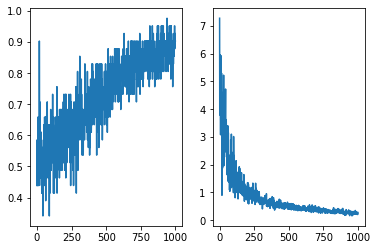

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']

loss = history.history['loss']
epochs_range = range(EPOCHS)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')

In [ ]:
predictionsTest = model.predict(Test)

In [ ]:
from colorama import init,Fore,Back,Style
count=0
Total=0
con_fas=0
fas_con=0
con_con=0
fas_fas=0
for i,c in enumerate(predictionsTest):
    Total=Total+1
    if(np.argmax(predictionsTest[i])==TestLabel[i]):
      count=count+1
      if(np.argmax(predictionsTest[i])==0):
        con_con=con_con+1
      else:
        fas_fas=fas_fas+1
      print(Fore.BLUE+Back.WHITE+"{} Resultados = {} Prediccion".format(np.argmax(c), TestLabel[i]))
    else:
      if(np.argmax(predictionsTest[i])==0):
        con_fas=con_fas+1
      else:
        fas_con=fas_con+1
      print(Fore.RED+"{} Resultados = {} Prediccion".format(np.argmax(c), TestLabel[i]))
print(count/Total)
print(fas_fas/Total,fas_con/Total)
print(con_fas/Total,con_con/Total)

1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
0 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
0 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
0 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultad

In [ ]:
predictions = model.predict(validation_x)

In [ ]:
from colorama import init,Fore,Back,Style
count=0
for i,c in enumerate(predictions):
    if(np.argmax(predictions[i])==validation_y[i]):
      count=count+1
      print(Fore.BLUE+Back.WHITE+"{} Resultados = {} Prediccion".format(np.argmax(c), validation_y[i]))
    else:
      print(Fore.RED+"{} Resultados = {} Prediccion".format(np.argmax(c), validation_y[i]))
print(count/num_validation_examples)

1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
0.34375


In [ ]:
predictions1 = model1.predict(validation_x)

In [ ]:
count=0
falso_N=0
falso_P=0

for i,c in enumerate(predictions1):
    if(np.argmax(predictions1[i])==validation_y[i]):
      count=count+1
      print(Fore.BLUE+Back.WHITE+"{} Resultados = {} Prediccion".format(np.argmax(c), validation_y[i]))
    else:
      print(Fore.RED+Back.WHITE+"{} Resultados = {} Prediccion".format(np.argmax(c), validation_y[i]))
print(count/num_validation_examples)


1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [1] Prediccion
1 Resultados = [0] Prediccion
0.34375


Text(0, 0.5, 'Precisión')

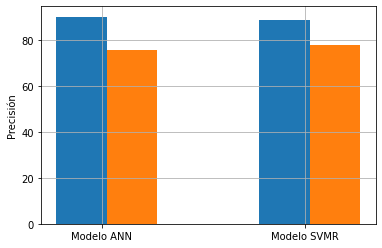

In [ ]:
datos = [[90.24, 89], [75.55, 77.7]]
X = np.arange(2)
plt.grid(True)
plt.bar(X + 0.00, datos[0], width = 0.25)
plt.bar(X + 0.25, datos[1], width = 0.25)
plt.xticks(X+0.10, ["Modelo ANN","Modelo SVMR"])
plt.ylabel("Precisión")